In [142]:
import os, lzma
import torch
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

# automate downloading the openwebtext


# takes a directory path as input and returns a list of filenames for files with a ".xz" ot "txt" extension in that directory
def xz_files_in_dir(directory):
    files = []
    for filename in os.listdir(directory):
        if (filename.endswith(".xz") or filename.endswith(".txt")) and os.path.isfile(
            os.path.join(directory, filename)
        ):
            files.append(filename)
    return files


# folder_path = "C:/Users/ealtzha/OneDrive - Ericsson/Desktop/THESIS/openwebtext/openwebtext"  # where our xz files are located
folder_path = (
    "C:\\Users\\ealtzha\\OneDrive - Ericsson\\Desktop\\THESIS\\data-for-model-training"
)

output_file_train = "data/train_test.txt"
output_file_val = "data/val_test.txt"
vocab_file = "data/vocab_test.txt"  # file where we want to save our vocabulary,

In [143]:
# from the file that we are reading each time when we get the new character we gonna push it into this file
# vocab_file simply contains all the unique characters in our file

files = xz_files_in_dir(folder_path)
total_files = len(files)
total_files

6

In [144]:
# Calculate the split indices
split_index = int(total_files * 0.9)  # 90% for training
files_train = files[:split_index]
print(f"Files for the training: {files_train}")
files_val = files[split_index:]
print(f"Files for the validation: {files_val}")

Files for the training: ["alice's adventures in wonderland.txt", 'artur conan doyle.txt', 'philosophy.txt', 'pride&prejudice.txt', 'tinyshakespeare.txt']
Files for the validation: ['wizard of oz.txt']


In [145]:
# Split into train and validation data (we don't want out AI to generate exact same data, but to generate something like it)
# process the training and validation seperately
vocab = list()

In [146]:
# it reads the content using lzma.open to decompress the data (assuming it's compressed with LZMA),
# then writes the content to the output file. Meanwhile, it keeps track of unique characters encountered in the vocab set
# process the training files
with open("data/train_split.txt", "w", encoding="utf-8") as outfile:
    for filename in tqdm(files_train, total=len(files_train)):
        file_path = os.path.join(folder_path, filename)
        with (
            open(file_path, "rt", encoding="utf-8")
            if filename.endswith(".txt")
            else lzma.open(file_path, "rt", encoding="utf-8")
        ) as infile:
            text = infile.read()
            outfile.write(text)
            characters = list(text)
print(characters[:30])
vocab.extend(characters)  # uncomment when you want to update your vocab.txt
print(set(vocab))

# bigram table can be showen from here, since we already have a massive string

100%|█████████████████████████████| 5/5 [00:00<00:00, 22.26it/s]

['F', 'i', 'r', 's', 't', ' ', 'C', 'i', 't', 'i', 'z', 'e', 'n', ':', '\n', 'B', 'e', 'f', 'o', 'r', 'e', ' ', 'w', 'e', ' ', 'p', 'r', 'o', 'c', 'e']
{'v', '\n', 'V', 'R', '!', 'd', 'y', 'N', ':', 'G', 'c', 'J', 'Q', 'u', 'j', 'o', 'F', '.', 'O', 'S', '-', 'w', ' ', 'A', '&', 'n', 'a', ',', 'k', 'W', 'i', 'B', 'p', 'r', 'q', 'L', 'Y', 'm', 'X', 's', 'g', 'H', 'b', '?', 'P', 'E', 'e', 'f', 't', 'z', 'x', 'Z', 'h', 'l', 'T', 'U', 'C', 'K', '3', 'D', 'M', 'I', ';', "'"}


In [147]:
# process the validation files
with open("data/val_split.txt", "w", encoding="utf-8") as outfile:
    for filename in tqdm(files_val, total=len(files_val)):
        file_path = os.path.join(folder_path, filename)
        with (
            open(file_path, "rt", encoding="utf-8")
            if filename.endswith(".txt")
            else lzma.open(file_path, "rt", encoding="utf-8")
        ) as infile:
            text = infile.read()
            outfile.write(text)
            characters = list(text)
print(characters[:30])
vocab.extend(characters)
print(set(vocab))

100%|█████████████████████████████| 1/1 [00:00<00:00, 96.37it/s]

['T', 'h', 'e', ' ', 'W', 'o', 'n', 'd', 'e', 'r', 'f', 'u', 'l', ' ', 'W', 'i', 'z', 'a', 'r', 'd', ' ', 'o', 'f', ' ', 'O', 'z', '\n', '\n', '\n', '\n']
{'v', '\n', 'V', '’', 'R', '!', 'd', 'y', 'N', ':', 'G', 'c', 'J', 'Q', 'u', 'j', 'o', 'F', '.', 'O', '“', '”', 'S', '-', 'w', ' ', 'A', '&', '‘', 'n', 'a', ',', 'k', '(', 'W', 'i', 'B', 'p', 'r', 'q', 'L', 'Y', 'm', 'X', 's', 'g', 'H', ')', 'b', '?', 'P', 'E', 'e', 'f', 't', 'z', 'x', 'Z', 'h', 'l', 'T', 'U', '—', 'C', 'K', '3', 'D', 'M', 'I', ';', "'"}


In [148]:
# the unique characters in the vocabulary are then written to a file specified
# by vocab_file (presumably as a list of characters, one per line)

with open(vocab_file, "w", encoding="utf-8") as vfile:
    for char in vocab:
        vfile.write(char + "\n")

In [149]:
with open(vocab_file, 'r', encoding='utf-8') as file:
    words = file.read().split()

In [150]:
words[:10]

['F', 'i', 'r', 's', 't', 'C', 'i', 't', 'i', 'z']

In [151]:
len(words)

1070502

In [152]:
b = {}
for ch1, ch2 in zip(words, words[1:]):
    bigram = (ch1, ch2)
    b[bigram] = b.get(bigram, 0) + 1
  # chs = ['<S>'] + list(w) + ['<E>']
  # for ch1, ch2 in zip(chs, chs[1:]):
    # bigram = (ch1, ch2)
    # b[bigram] = b.get(bigram, 0) + 1

In [153]:
sorted(b.items(), key = lambda kv: -kv[1])

[(('t', 'h'), 29577),
 (('h', 'e'), 24491),
 (('e', 'r'), 15053),
 (('o', 'u'), 14629),
 (('a', 'n'), 13175),
 (('i', 'n'), 12905),
 (('r', 'e'), 12473),
 (('h', 'a'), 11839),
 (('n', 'd'), 11838),
 (('s', 't'), 10358),
 (('e', 's'), 10108),
 (('o', 'r'), 10042),
 (('e', 'a'), 9980),
 (('a', 't'), 9821),
 (('e', 'n'), 9699),
 (('t', 'o'), 8565),
 (('a', 'r'), 8547),
 (('i', 's'), 8419),
 (('h', 'i'), 8310),
 (('e', 't'), 7928),
 (('o', 'n'), 7900),
 (('l', 'l'), 7558),
 (('i', 't'), 7364),
 (('m', 'e'), 7034),
 (('v', 'e'), 7011),
 (('e', 'd'), 6922),
 (('n', 't'), 6824),
 (('s', 'e'), 6641),
 (('o', 't'), 6621),
 (('n', 'o'), 6471),
 (('n', 'g'), 6404),
 (('h', 'o'), 6165),
 (('u', 'r'), 5846),
 (('y', 'o'), 5767),
 (('a', 's'), 5691),
 (('r', 'o'), 5504),
 (('l', 'e'), 5483),
 (('t', 'e'), 5458),
 (('o', 'w'), 5363),
 (('a', 'l'), 5272),
 (('e', 'e'), 5125),
 (('e', 'l'), 5122),
 (('o', 'f'), 5071),
 (('o', 'm'), 5067),
 (('s', 'h'), 5042),
 (('n', 'e'), 4900),
 (('t', 'i'), 4728),
 

In [154]:
import torch

In [162]:
N = torch.zeros((69, 69), dtype=torch.int32)

In [163]:
chars = sorted(list(set(words)))
print(chars)
print(len(chars))
stoi = {s:i for i,s in enumerate(chars)}
itos = {i:s for s,i in stoi.items()}

['!', '&', "'", '(', ')', ',', '-', '.', '3', ':', ';', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '—', '‘', '’', '“', '”']
69


In [164]:
for ch1, ch2 in zip(words, words[1:]):
    if ch1 in stoi and ch2 in stoi:  # Check if both characters are in the vocabulary
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        if ix1 >= len(chars) or ix2 >= len(chars):
            print(f"Index out of bounds for characters: {ch1}, {ch2}, Indices: {ix1}, {ix2}")
        else:
            N[ix1, ix2] += 1
    else:
        print(f"Unseen characters: {ch1}, {ch2}")  # Debugging print for unseen characters


In [165]:
N

tensor([[  0,   0,  57,  ...,   0,   0,  77],
        [  0,   0,   0,  ...,   0,   0,   0],
        [  3,   0,  17,  ...,   0,   0,   0],
        ...,
        [  0,   0,   0,  ...,   0,   4,   6],
        [  0,   0,   0,  ...,   0,   0,   0],
        [  0,   0,   0,  ...,   0, 285,   0]], dtype=torch.int32)

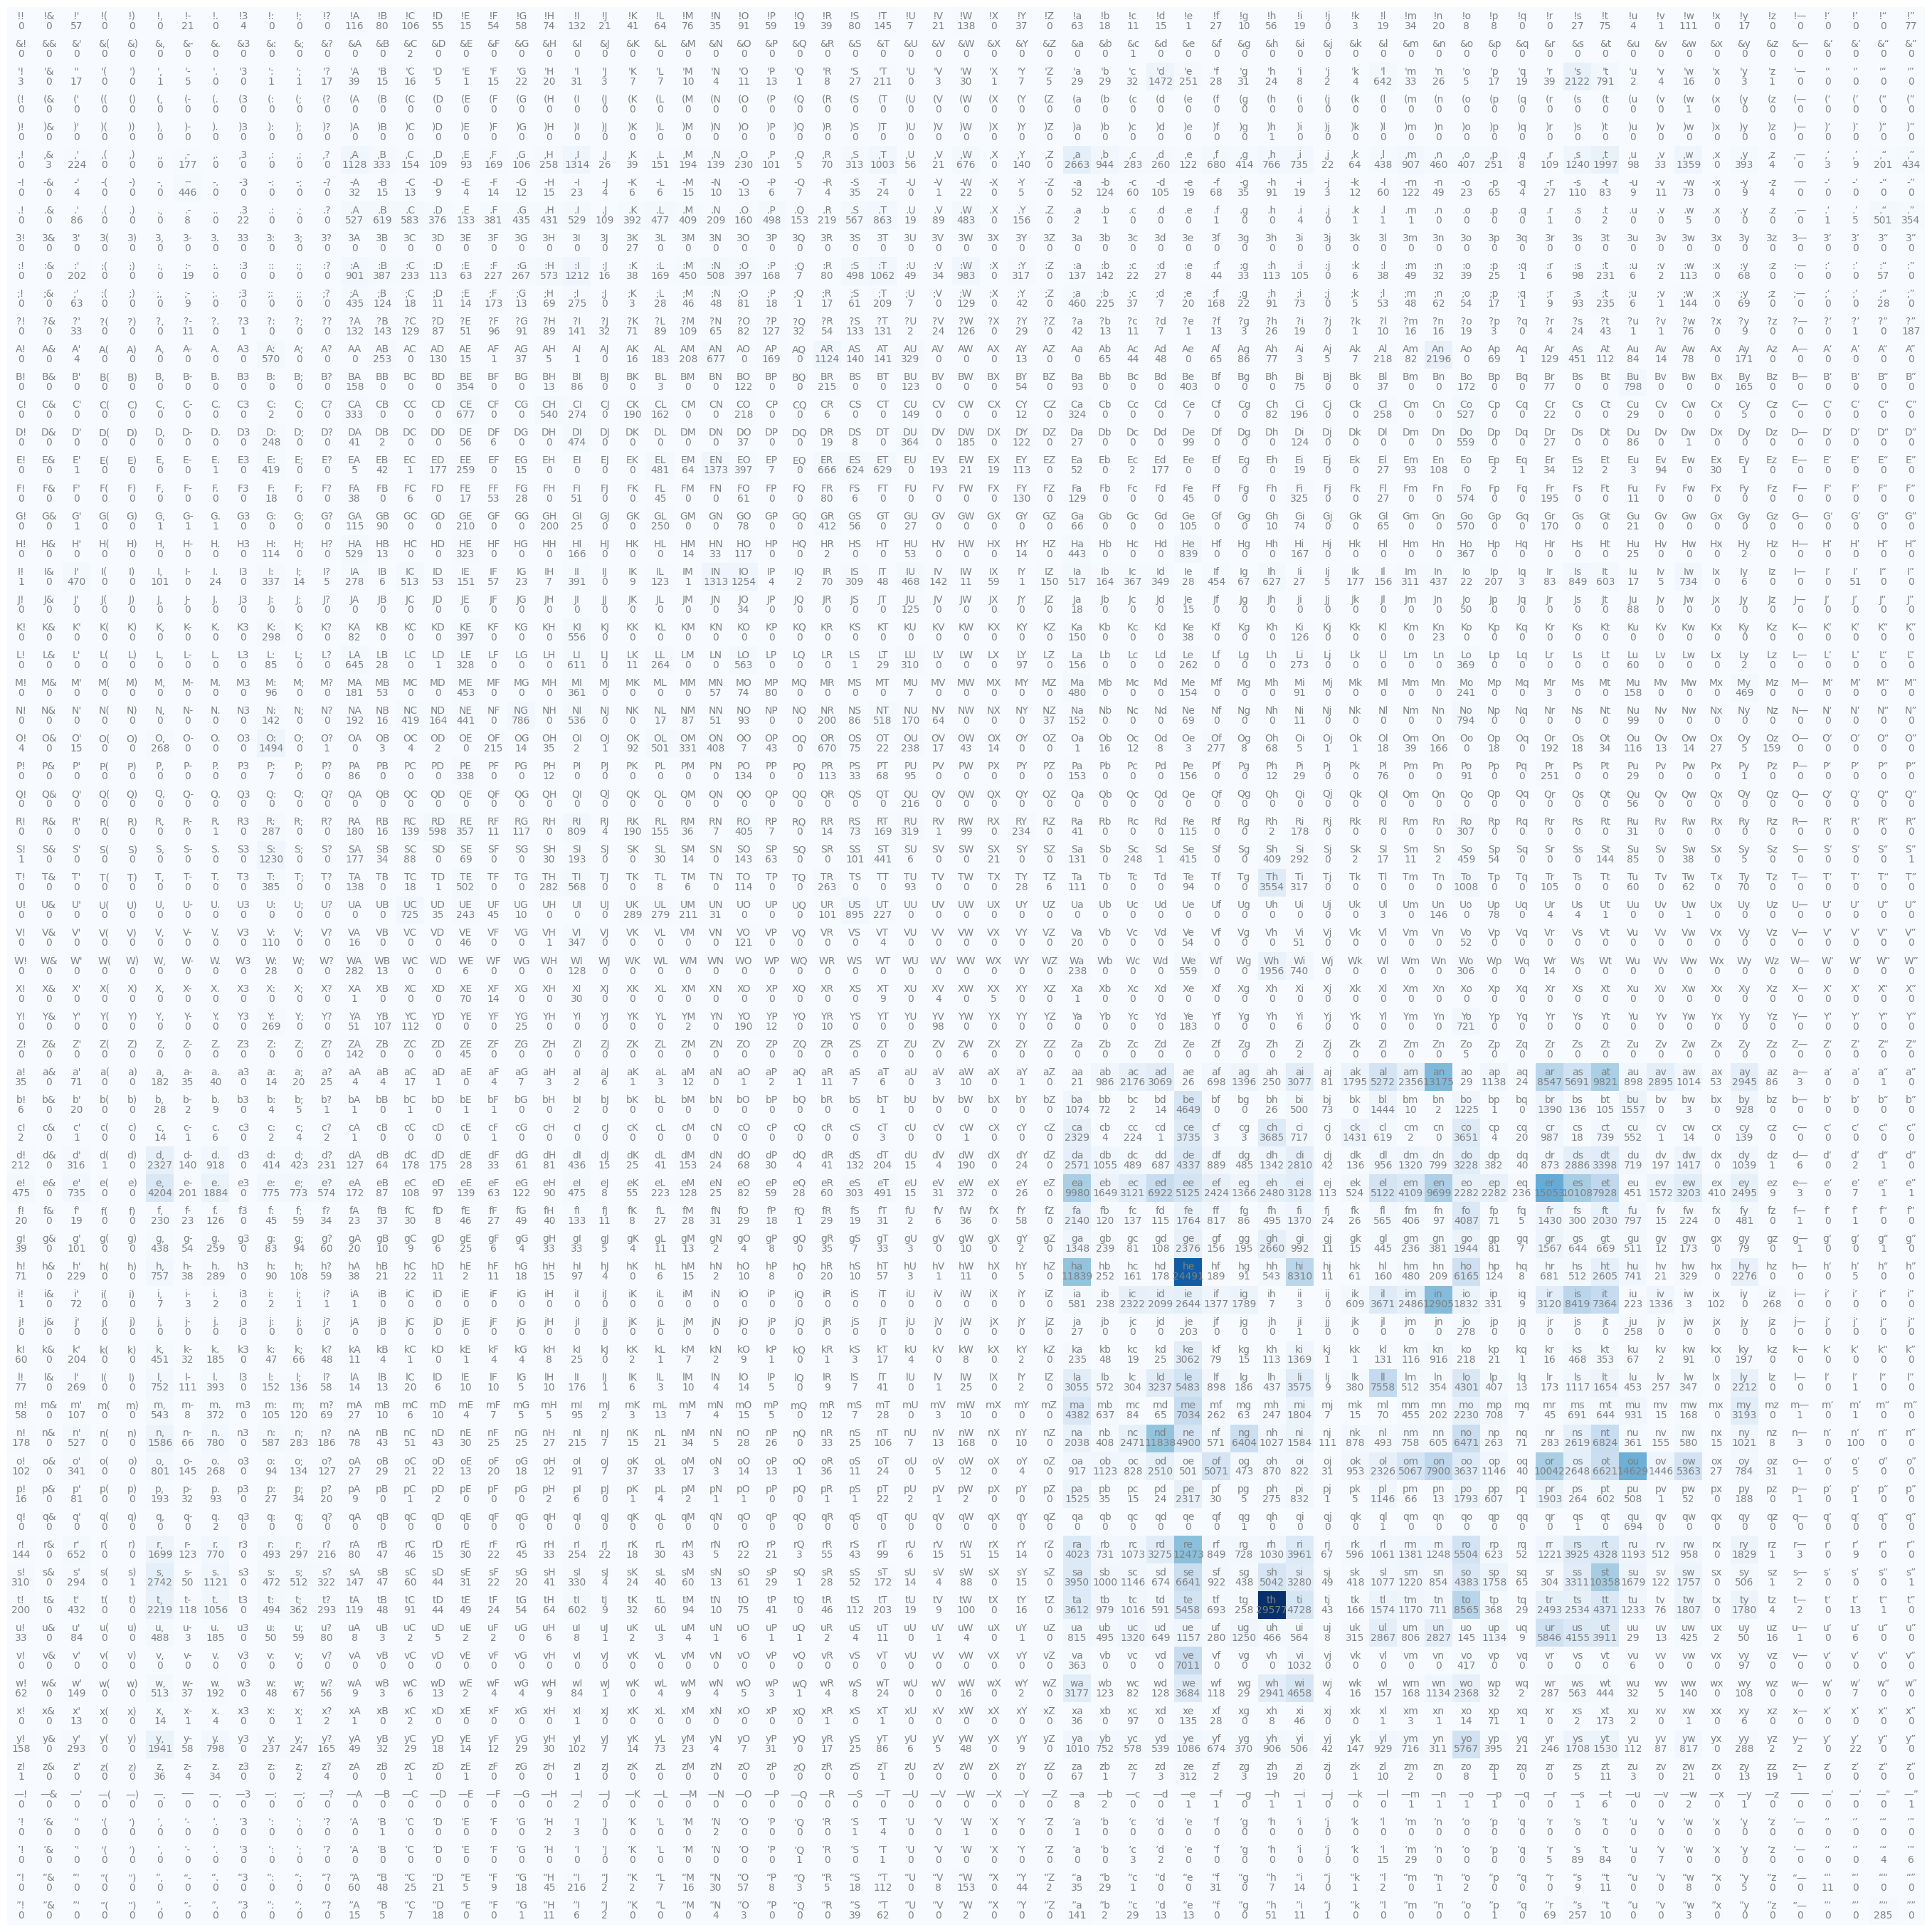

In [172]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(35,35))
plt.imshow(N, cmap='Blues')
for i in range(69):
    for j in range(69):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');